# Project topic-

### The relation between covid infection rates and the political orientation of the population and their level of education.

$y$ = infection rates

$x_1$ = political orientation

$x_2$ = level of education

- potentially useful variable to add more context: The field of the people's education,i.e., a degree in arts vs a degree in chem e

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import scipy.optimize as sciopt
import pandas as pd
from scipy import stats

# import scipy.integrate as scint
import statsmodels.api as sm
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

# The following code block deals with getting the COVID INFECTION DATA

Since the data is over a time period, we take the average number of cases over that time period as an indicator of the covid infection rate. We then convert that into the percentage of population infected to normalize the infection rate with a county's population.


In [2]:
# Reading from a CSV file

df = pd.read_csv("us-counties-recent.csv")
df = df[df["state"] == "Pennsylvania"]
df

date        county         state     fips   cases  deaths
2272    17-09-2022         Adams  Pennsylvania  42001.0   28510   392.0
2273    17-09-2022     Allegheny  Pennsylvania  42003.0  315361  3525.0
2274    17-09-2022     Armstrong  Pennsylvania  42005.0   17064   368.0
2275    17-09-2022        Beaver  Pennsylvania  42007.0   45683   778.0
2276    17-09-2022       Bedford  Pennsylvania  42009.0   12071   282.0
...            ...           ...           ...      ...     ...     ...
100044  17-10-2022    Washington  Pennsylvania  42125.0   60439   691.0
100045  17-10-2022         Wayne  Pennsylvania  42127.0   12129   183.0
100046  17-10-2022  Westmoreland  Pennsylvania  42129.0   93270  1470.0
100047  17-10-2022       Wyoming  Pennsylvania  42131.0    6076   115.0
100048  17-10-2022          York  Pennsylvania  42133.0  137108  1582.0

[2077 rows x 6 columns]

<IPython.core.display.Javascript object>

In [3]:
# Creating a new dataframe containing all the relevant data
means = np.array([])
county = np.array([])
deaths = np.array([])

for i in np.arange(42001, 42134, 2):
    dd = df[df["fips"] == i]
    means = np.concatenate([means, np.mean(dd["cases"])], axis=None)
    county = np.concatenate([county, dd.drop_duplicates(subset="county")["county"]])
    deaths = np.concatenate([deaths, np.mean(dd["deaths"])], axis=None)

covid = pd.DataFrame()
covid["fips"] = np.arange(42001, 42134, 2)
covid["cases_mean"] = means
covid["county"] = county
covid["deaths"] = deaths

<IPython.core.display.Javascript object>

In [4]:
# Similar method is followed for Ohio state data

df2 = pd.read_csv("us-counties-recent.csv")
df2 = df2[df2["state"] == "Ohio"]

means2 = np.array([])
county2 = np.array([])
deaths2 = np.array([])

for i in np.arange(39001, 39176, 2):
    dd2 = df2[df2["fips"] == i]
    means2 = np.concatenate([means2, np.mean(dd2["cases"])], axis=None)
    county2 = np.concatenate([county2, dd2.drop_duplicates(subset="county")["county"]])
    deaths2 = np.concatenate([deaths2, np.mean(dd2["deaths"])], axis=None)

dd2 = pd.DataFrame()
dd2["fips"] = np.arange(39001, 39176, 2)
dd2["cases_mean"] = means2
dd2["county"] = county2
dd2["deaths"] = deaths2

<IPython.core.display.Javascript object>

# WE HAVE LIMITED DATA!

We only have all the required data points for 39 out of 67 counties. We compensate for this by getting more states' data

### For Penn

In [5]:
# This excel sheet contains the total population of the relevant counties

pop = pd.read_excel("Penn age and sex.xlsx", sheet_name="Sheet2")

<IPython.core.display.Javascript object>

In [6]:
# The following block of code creates a list containing the names of the counties whose population and education data are unavailable
unavailable = []
counter = 0
for i in county:
    counter = 0
    # print(i)
    for j in pop.columns:
        if f"{i} County, Pennsylvania" == j:
            counter = counter + 1

        else:
            continue
    if counter == 0:
        unavailable.append(i)

<IPython.core.display.Javascript object>

In [7]:
# This loop removes all the data points of the unavailable counties from our dataframe

for i in unavailable:
    ddx = covid.where(covid["county"] == i)
    covid = covid.drop(index=ddx.dropna().index[0])

<IPython.core.display.Javascript object>

In [8]:
a = np.array(pop.iloc[2])
a = a[1:]
covid["total population"] = a

<IPython.core.display.Javascript object>

In [9]:
covid["percentage infected"] = covid.apply(
    lambda x: x["cases_mean"] / x["total population"],
    axis=1,
)

covid["percentage dead"] = covid.apply(
    lambda x: x["deaths"] / x["total population"],
    axis=1,
)


<IPython.core.display.Javascript object>

### For Ohio

In [10]:
pop_ohio = pd.read_excel("Ohio age and sex.xlsx", sheet_name="Data")

for i in np.arange(2, 148, 1):
    if (i - 1) % 4 == 0:
        continue
    else:
        pop_ohio = pop_ohio.drop(columns=[f"Unnamed: {i}"])

unavailable_ohio = []
counter = 0
for i in county2:
    counter = 0
    # print(i)
    for j in pop_ohio.columns:
        if f"{i} County, Ohio" == j:
            counter = counter + 1

        else:
            continue
    if counter == 0:
        unavailable_ohio.append(i)


for i in unavailable_ohio:
    ddx = dd2.where(dd2["county"] == i)
    dd2 = dd2.drop(index=ddx.dropna().index[0])


<IPython.core.display.Javascript object>

In [11]:
aa = np.array(pop_ohio.iloc[2])
aa = aa[1:]
aa = aa[:-1]
dd2["total population"] = aa

# orientation

dd2["percentage infected"] = dd2.apply(
    lambda x: x["cases_mean"] / x["total population"],
    axis=1,
)
dd2["percentage dead"] = dd2.apply(
    lambda x: x["deaths"] / x["total population"],
    axis=1,
)

<IPython.core.display.Javascript object>

### For New Jersey

In [12]:
df3 = pd.read_csv("us-counties-recent.csv")
df3 = df3[df3["state"] == "New Jersey"]
means3 = np.array([])
county3 = np.array([])
deaths3 = np.array([])

for i in np.arange(34001, 34042, 2):
    dd3 = df3[df3["fips"] == i]
    means3 = np.concatenate([means3, np.mean(dd3["cases"])], axis=None)
    county3 = np.concatenate([county3, dd3.drop_duplicates(subset="county")["county"]])
    deaths3 = np.concatenate([deaths3, np.mean(dd3["deaths"])], axis=None)

dd3 = pd.DataFrame()
dd3["fips"] = np.arange(34001, 34042, 2)
dd3["cases_mean"] = means3
dd3["county"] = county3
dd3["deaths"] = deaths3

pop_New_Jersey = pd.read_excel("New Jersey age and sex.xlsx", sheet_name="Data")

for i in np.arange(2, 84, 1):
    if (i - 1) % 4 == 0:
        continue
    else:
        pop_New_Jersey = pop_New_Jersey.drop(columns=[f"Unnamed: {i}"])

aaa = np.array(pop_New_Jersey.iloc[2])
aaa = aaa[1:]
aaa = aaa[:-1]
dd3["total population"] = aaa

# orientation

dd3["percentage infected"] = dd3.apply(
    lambda x: x["cases_mean"] / x["total population"],
    axis=1,
)

dd3["percentage dead"] = dd3.apply(
    lambda x: x["deaths"] / x["total population"],
    axis=1,
)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of the %population infected by covid of counties')

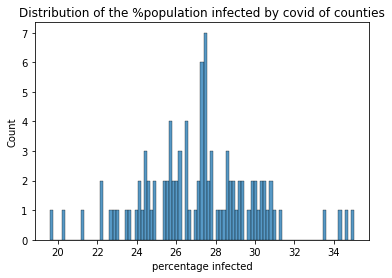

<IPython.core.display.Javascript object>

In [13]:
covid = pd.concat([covid, dd2, dd3])
sns.histplot(covid["percentage infected"] * 100, bins=97)
plt.title("Distribution of the %population infected by covid of counties")

Text(0.5, 1.0, 'Distribution of the %population dead by covid of counties')

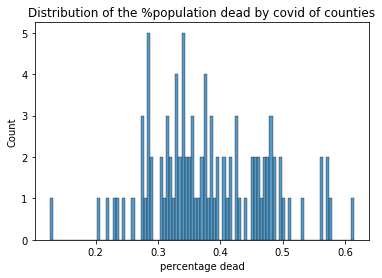

<IPython.core.display.Javascript object>

In [14]:
sns.histplot(covid["percentage dead"] * 100, bins=97)
plt.title("Distribution of the %population dead by covid of counties")

# The following code block deals with getting the POPULATION EDUCATION DATA

This is our limiting/constraining data. 

The education levels are as follows:
1. Less than 9th grade	
2. 9th to 12th grade, no diploma	
3. High school graduate (includes equivalency)	
4. Some college, no degree	
5. Associate's degree	
6. Bachelor's degree	
7. Graduate or professional degree	

Each of these has been assigned an arbitrary weightage of 10, 20, 30, 40, 50, 60, and 70 respectively. This helps us calculate a quantity called the "Average education level of a county", given by the formula:

## <center>$avg_{county} =   \frac{{\sum}_{i=1}^{7} (10i) * (Pop_i) } {Pop_{tot}}$</center>

where, 

$pop_i$ is the number of people with $i^{th}$ educational qualification 

$pop_{tot}$ is the total population of that county

### For Penn

In [15]:
# code for getting the education data and weeding out unnecessary columns

edu = pd.read_excel("Penn better education data.xlsx", sheet_name="Data")

for i in np.arange(2, 79, 2):
    edu = edu.drop(columns=[f"Unnamed: {i}"])

<IPython.core.display.Javascript object>

In [16]:
# Code for getting the Average education level of the counties
avg = np.array([])
for j in np.arange(1, len(edu.columns)):
    a = 0
    tot = 0
    for i in np.arange(1, 9):
        tot = tot + (i - 1) * 10 * int(edu[edu.columns[j]][i])
        a = tot / edu[edu.columns[j]][1]

    avg = np.concatenate([avg, a], axis=None)

<IPython.core.display.Javascript object>

### For Ohio

In [17]:
edu_ohio = pd.read_excel("Ohio education data.xlsx", sheet_name="Data")

for i in np.arange(2, 75, 2):
    edu_ohio = edu_ohio.drop(columns=[f"Unnamed: {i}"])

avg2 = np.array([])
for j in np.arange(1, len(edu_ohio.columns)):
    a = 0
    tot = 0
    for i in np.arange(1, 9):
        tot = tot + (i - 1) * 10 * int(edu_ohio[edu_ohio.columns[j]][i])
        # print(type(tot))
        a = tot / edu_ohio[edu_ohio.columns[j]][1]
        # print(a)
    avg2 = np.concatenate([avg2, a], axis=None)

<IPython.core.display.Javascript object>

### For New Jersey

In [18]:
edu_New_Jersey = pd.read_excel("New Jersey education data.xlsx", sheet_name="Data")

for i in np.arange(2, 43, 2):
    edu_New_Jersey = edu_New_Jersey.drop(columns=[f"Unnamed: {i}"])

avg3 = np.array([])
for j in np.arange(1, len(edu_New_Jersey.columns)):
    a = 0
    tot = 0
    for i in np.arange(1, 9):
        tot = tot + (i - 1) * 10 * int(edu_New_Jersey[edu_New_Jersey.columns[j]][i])
        # print(type(tot))
        a = tot / edu_New_Jersey[edu_New_Jersey.columns[j]][1]
        # print(a)
    avg3 = np.concatenate([avg3, a], axis=None)

<IPython.core.display.Javascript object>

In [19]:
avg = np.concatenate([avg, avg2, avg3])



<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of the average education level of each county')

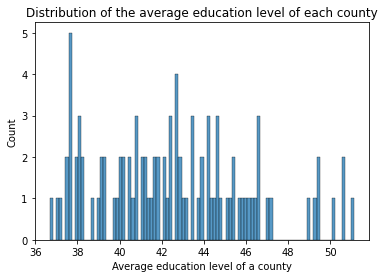

<IPython.core.display.Javascript object>

In [20]:
sns.histplot(avg, bins=97)
plt.xlabel("Average education level of a county")
plt.title("Distribution of the average education level of each county")

# The following code block deals with getting the VOTER DATA

Here, each county is assigned a parameter called "Orientation". This parameter is 0 if a county has more republican voters than democrats and 1 otherwise. Voters who didn't vote for either of the two parties have been neglected as they are not relevant for our problem statement.

### For Penn

In [21]:
# Code for reading data from excel and removing excess
voter = pd.read_excel("Penn currentvotestats.xlsx")
for i in np.arange(3, 10, 2):
    voter = voter.drop(columns=[f"Unnamed: {i}"])

voter = voter.drop(index=67)

<IPython.core.display.Javascript object>

In [22]:
# Calculating orientation of each county
# voter["Orientation"] = voter.apply(
#     lambda x: 1
#     if x["Count of Democratic Voters"] > x["Count of Republican Voters"]
#     else 0,
#     axis=1,
# )
voter["Orientation"] = voter.apply(
    lambda x: 100 * x["Count of Democratic Voters"] / x["Total Count of All Voters"]
    if x["Count of Democratic Voters"] > x["Count of Republican Voters"]
    else -100 * x["Count of Republican Voters"] / x["Total Count of All Voters"],
    axis=1,
)

<IPython.core.display.Javascript object>

In [23]:
# Removing the unrequired counties

for i in unavailable:
    if i == "McKean":
        ddx = voter.where(voter.County == "McKEAN")
    else:
        ddx = voter.where(voter.County == i.upper())
    ind = ddx.dropna().index[0]
    voter = voter.drop(index=ind)

<IPython.core.display.Javascript object>

### For Ohio

In [24]:
voter_ohio = pd.read_excel("Ohio voter data.xlsx")

voter_ohio["Orientation"] = voter_ohio.apply(
    lambda x: 100 * x["Democratic Ballots Cast"] / x["Total Ballots Cast"]
    if x["Democratic Ballots Cast"] > x["Republican Ballots Cast"]
    else -100 * x["Republican Ballots Cast"] / x["Total Ballots Cast"],
    axis=1,
)

voter_ohio = voter_ohio[1:]

for i in unavailable_ohio:
    ddx = voter_ohio.where(voter_ohio["CountyNumber"] == i)
    voter_ohio = voter_ohio.drop(index=ddx.dropna().index[0])


# plt.hist(voter_ohio["Orientation"])

<IPython.core.display.Javascript object>

### For New Jersey

In [25]:
voter_New_Jersey = pd.read_excel("New Jersey voter data.xlsx")

voter_New_Jersey["Orientation"] = voter_New_Jersey.apply(
    lambda x: 100 * x["DEM"] / x["Total"]
    if x["DEM"] > x["REP"]
    else -100 * x["REP"] / x["Total"],
    axis=1,
)


<IPython.core.display.Javascript object>

In [26]:
voter_data = np.concatenate(
    [voter["Orientation"], voter_ohio["Orientation"], voter_New_Jersey["Orientation"]]
)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Orientation of counties')

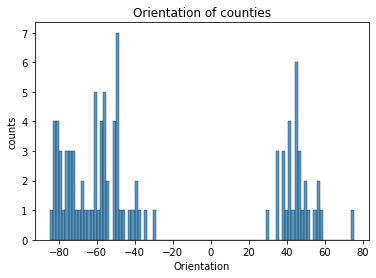

<IPython.core.display.Javascript object>

In [27]:
# plt.hist(voter["Orientation"])
sns.histplot(voter_data, bins=97)
plt.xlabel("Orientation")
plt.ylabel("counts")
plt.title("Orientation of counties")

## Final Data set-

In [28]:
final = pd.DataFrame()
final["y"] = covid["percentage infected"] * 100
final["x1"] = avg
final["x2"] = voter_data
final["int"] = final["x1"] * final["x2"]
final["y2"] = covid["percentage dead"] * 100

<IPython.core.display.Javascript object>

In [29]:
final

y         x1         x2          int        y2
0   27.672473  40.491208 -57.062540 -2310.531154  0.378105
1   25.707420  47.243796  56.890716  2687.733364  0.286646
2   26.436815  38.142131 -60.073011 -2291.312698  0.570350
3   27.674188  42.776953  44.287633  1894.490022  0.468217
5   27.264737  40.136647  42.257420  1696.071154  0.388096
..        ...        ...        ...          ...       ...
16  25.996888  40.539946  30.450244  1234.451262  0.397188
17  25.391214  51.127301  35.592532  1819.750093  0.290050
18  28.279571  45.917695 -41.737387 -1916.484608  0.347664
19  30.998971  45.344258  47.844218  2169.460570  0.425039
20  26.078107  44.316850 -39.679209 -1758.457580  0.319723

[97 rows x 5 columns]

<IPython.core.display.Javascript object>

In [47]:
sol = sm.OLS(final["y"], sm.add_constant(final[["x1", "x2", "int"]])).fit()

print(sol.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.748
Date:                Tue, 25 Oct 2022   Prob (F-statistic):             0.0473
Time:                        12:05:55   Log-Likelihood:                -235.86
No. Observations:                  97   AIC:                             479.7
Df Residuals:                      93   BIC:                             490.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4315      4.685      7.777      0.0

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Plot of y vs x1')

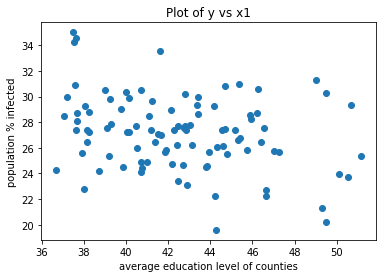

<IPython.core.display.Javascript object>

In [41]:
plt.scatter(final["x1"], final["y"])
plt.xlabel("average education level of counties")
plt.ylabel("population % infected")
plt.title("Plot of y vs x1")

Text(0.5, 1.0, 'Plot of y vs x2')

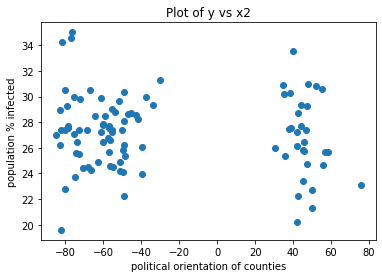

<IPython.core.display.Javascript object>

In [40]:
plt.scatter(final["x2"], final["y"])
plt.xlabel("political orientation of counties")
plt.ylabel("population % infected")
plt.title("Plot of y vs x2")

Text(0.5, 1.0, 'Plot of x1 vs x2')

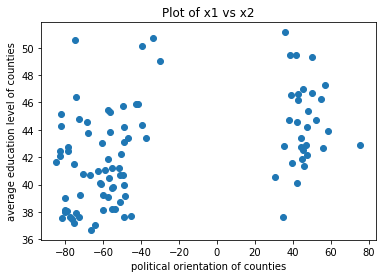

<IPython.core.display.Javascript object>

In [42]:
plt.scatter(final["x2"], final["x1"])
plt.xlabel("political orientation of counties")
plt.ylabel("average education level of counties")
plt.title("Plot of x1 vs x2")

In [46]:
sol = sm.OLS(final["x1"], sm.add_constant(final["x2"])).fit()

print(sol.summary())

                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     20.96
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.42e-05
Time:                        12:05:46   Log-Likelihood:                -251.27
No. Observations:                  97   AIC:                             506.5
Df Residuals:                      95   BIC:                             511.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3218      0.375    115.627      0.0

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Plot of y2 vs x1')

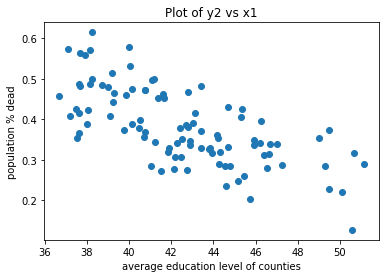

<IPython.core.display.Javascript object>

In [48]:
plt.scatter(final["x1"], final["y2"])
plt.xlabel("average education level of counties")
plt.ylabel("population % dead")
plt.title("Plot of y2 vs x1")

Text(0.5, 1.0, 'Plot of y2 vs x2')

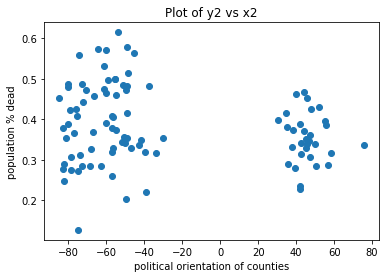

<IPython.core.display.Javascript object>

In [49]:
plt.scatter(final["x2"], final["y2"])
plt.xlabel("political orientation of counties")
plt.ylabel("population % dead")
plt.title("Plot of y2 vs x2")

In [50]:
sol2 = sm.OLS(final["y2"], sm.add_constant(final[["x1", "x2", "int"]])).fit()

print(sol2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     30.96
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           5.73e-14
Time:                        12:10:56   Log-Likelihood:                 126.49
No. Observations:                  97   AIC:                            -245.0
Df Residuals:                      93   BIC:                            -234.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0809      0.112      9.671      0.0

<IPython.core.display.Javascript object>